<a href="https://colab.research.google.com/github/t-abs/Data-Science/blob/main/TitanicData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score


In [16]:
test=pd.read_csv("/content/test (1).csv")

In [17]:
train=pd.read_csv("/content/train.csv")

In [18]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
test.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0          False   False  False  False  False  False  False   False  False   
1          False   False  False  False  False  False  False   False  False   
2          False   False  False  False  False  False  False   False  False   
3          False   False  False  False  False  False  False   False  False   
4          False   False  False  False  False  False  False   False  False   
..           ...     ...    ...    ...    ...    ...    ...     ...    ...   
413        False   False  False  False   True  False  False   False  False   
414        False   False  False  False  False  False  False   False  False   
415        False   False  False  False  False  False  False   False  False   
416        False   False  False  False   True  False  False   False  False   
417        False   False  False  False   True  False  False   False  False   

 

In [20]:
print(train.shape)
test.shape

(891, 12)


(418, 11)

<Axes: xlabel='Sex', ylabel='Survived'>

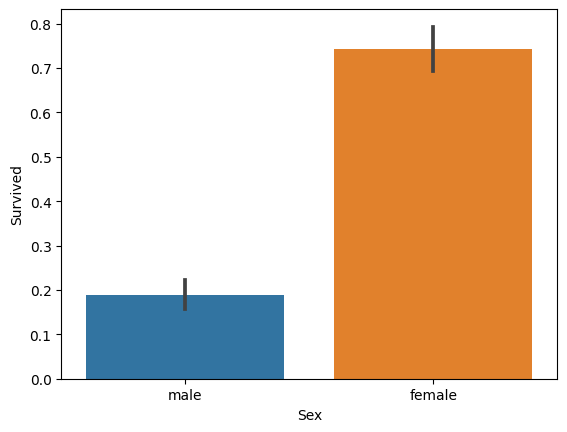

In [29]:
sns.barplot(x='Sex',y='Survived',data=train)

In [25]:
train.Age=train.Age.fillna(-0.5)
test.Age=test.Age.fillna(-0.5)

In [40]:
train.Age=train.Age.fillna(-0.5)
test.Age=test.Age.fillna(-0.5)
bins=[-1,0,5,12,18,24,35,np.inf]
labels=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']

test['AgeGroup']=pd.cut(test['Age'],bins,labels=labels)
sns.barplot(x='AgeGroup',y='Survived',data=test)
plt.show()


ValueError: ignored

In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [34]:
train=train.drop(['Ticket','Cabin','Fare'],axis=1)
test=test.drop(['Ticket','Cabin','Fare'],axis=1)

In [35]:
print('Number of people embarking in Southampton (S) :')
southampton = train[train['Embarked'] == 'S'].shape[0]
print(southampton)
print('Number of people embarking in Cherbourg (C) :')
cher = train[train['Embarked'] == 'C'].shape[0]
print(cher)
print('Number of people embarking in Queenstown (Q) :')
queen = train[train['Embarked'] == 'Q'].shape[0]
print(queen)


Number of people embarking in Southampton (S) :
644
Number of people embarking in Cherbourg (C) :
168
Number of people embarking in Queenstown (Q) :
77


In [36]:
train.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of      PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  \
0          False     False   False  False  False  False  False  False   
1          False     False   False  False  False  False  False  False   
2          False     False   False  False  False  False  False  False   
3          False     False   False  False  False  False  False  False   
4          False     False   False  False  False  False  False  False   
..           ...       ...     ...    ...    ...    ...    ...    ...   
886        False     False   False  False  False  False  False  False   
887        False     False   False  False  False  False  False  False   
888        False     False   False  False  False  False  False  False   
889        False     False   False  False  False  False  False  False   
890        False     False   False  False  False  False  False  False   

     Embarked  
0       False  
1       False  
2       False

In [37]:
train.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                     

In [47]:
encoder = LabelEncoder()
test['Name'] = encoder.fit_transform(test['Name'])

test['Sex'] = encoder.fit_transform(test['Sex'])
test['Embarked'] = encoder.fit_transform(test['Embarked'])


In [48]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Embarked
0,892,3,206,1,34.5,0,0,1
1,893,3,403,0,47.0,1,0,2
2,894,2,269,1,62.0,0,0,1
3,895,3,408,1,27.0,0,0,2
4,896,3,178,0,22.0,1,1,2


In [50]:
x=test.drop(columns='Embarked',axis=1)
y=test['Embarked']

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [52]:
from sklearn.tree import DecisionTreeClassifier
ds=DecisionTreeClassifier()
ds.fit(x_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred=ds.predict(x_test)

In [55]:
y_pred

array([2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 1, 1, 2, 0, 2, 2, 2, 2, 2, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 2, 2])

[Text(0.3776483050847458, 0.9666666666666667, 'x[1] <= 1.5\ngini = 0.506\nsamples = 313\nvalue = [75, 34, 204]'),
 Text(0.17372881355932204, 0.9, 'x[2] <= 263.0\ngini = 0.512\nsamples = 83\nvalue = [42, 1, 40]'),
 Text(0.11581920903954802, 0.8333333333333334, 'x[2] <= 167.5\ngini = 0.51\nsamples = 50\nvalue = [21, 1, 28]'),
 Text(0.07344632768361582, 0.7666666666666667, 'x[2] <= 148.5\ngini = 0.484\nsamples = 34\nvalue = [20, 0, 14]'),
 Text(0.062146892655367235, 0.7, 'x[0] <= 935.5\ngini = 0.499\nsamples = 27\nvalue = [13, 0, 14]'),
 Text(0.05084745762711865, 0.6333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.07344632768361582, 0.6333333333333333, 'x[0] <= 1174.5\ngini = 0.497\nsamples = 24\nvalue = [13, 0, 11]'),
 Text(0.04519774011299435, 0.5666666666666667, 'x[4] <= 34.5\ngini = 0.444\nsamples = 18\nvalue = [12, 0, 6]'),
 Text(0.022598870056497175, 0.5, 'x[0] <= 1037.5\ngini = 0.49\nsamples = 7\nvalue = [3, 0, 4]'),
 Text(0.011299435028248588, 0.433333333333

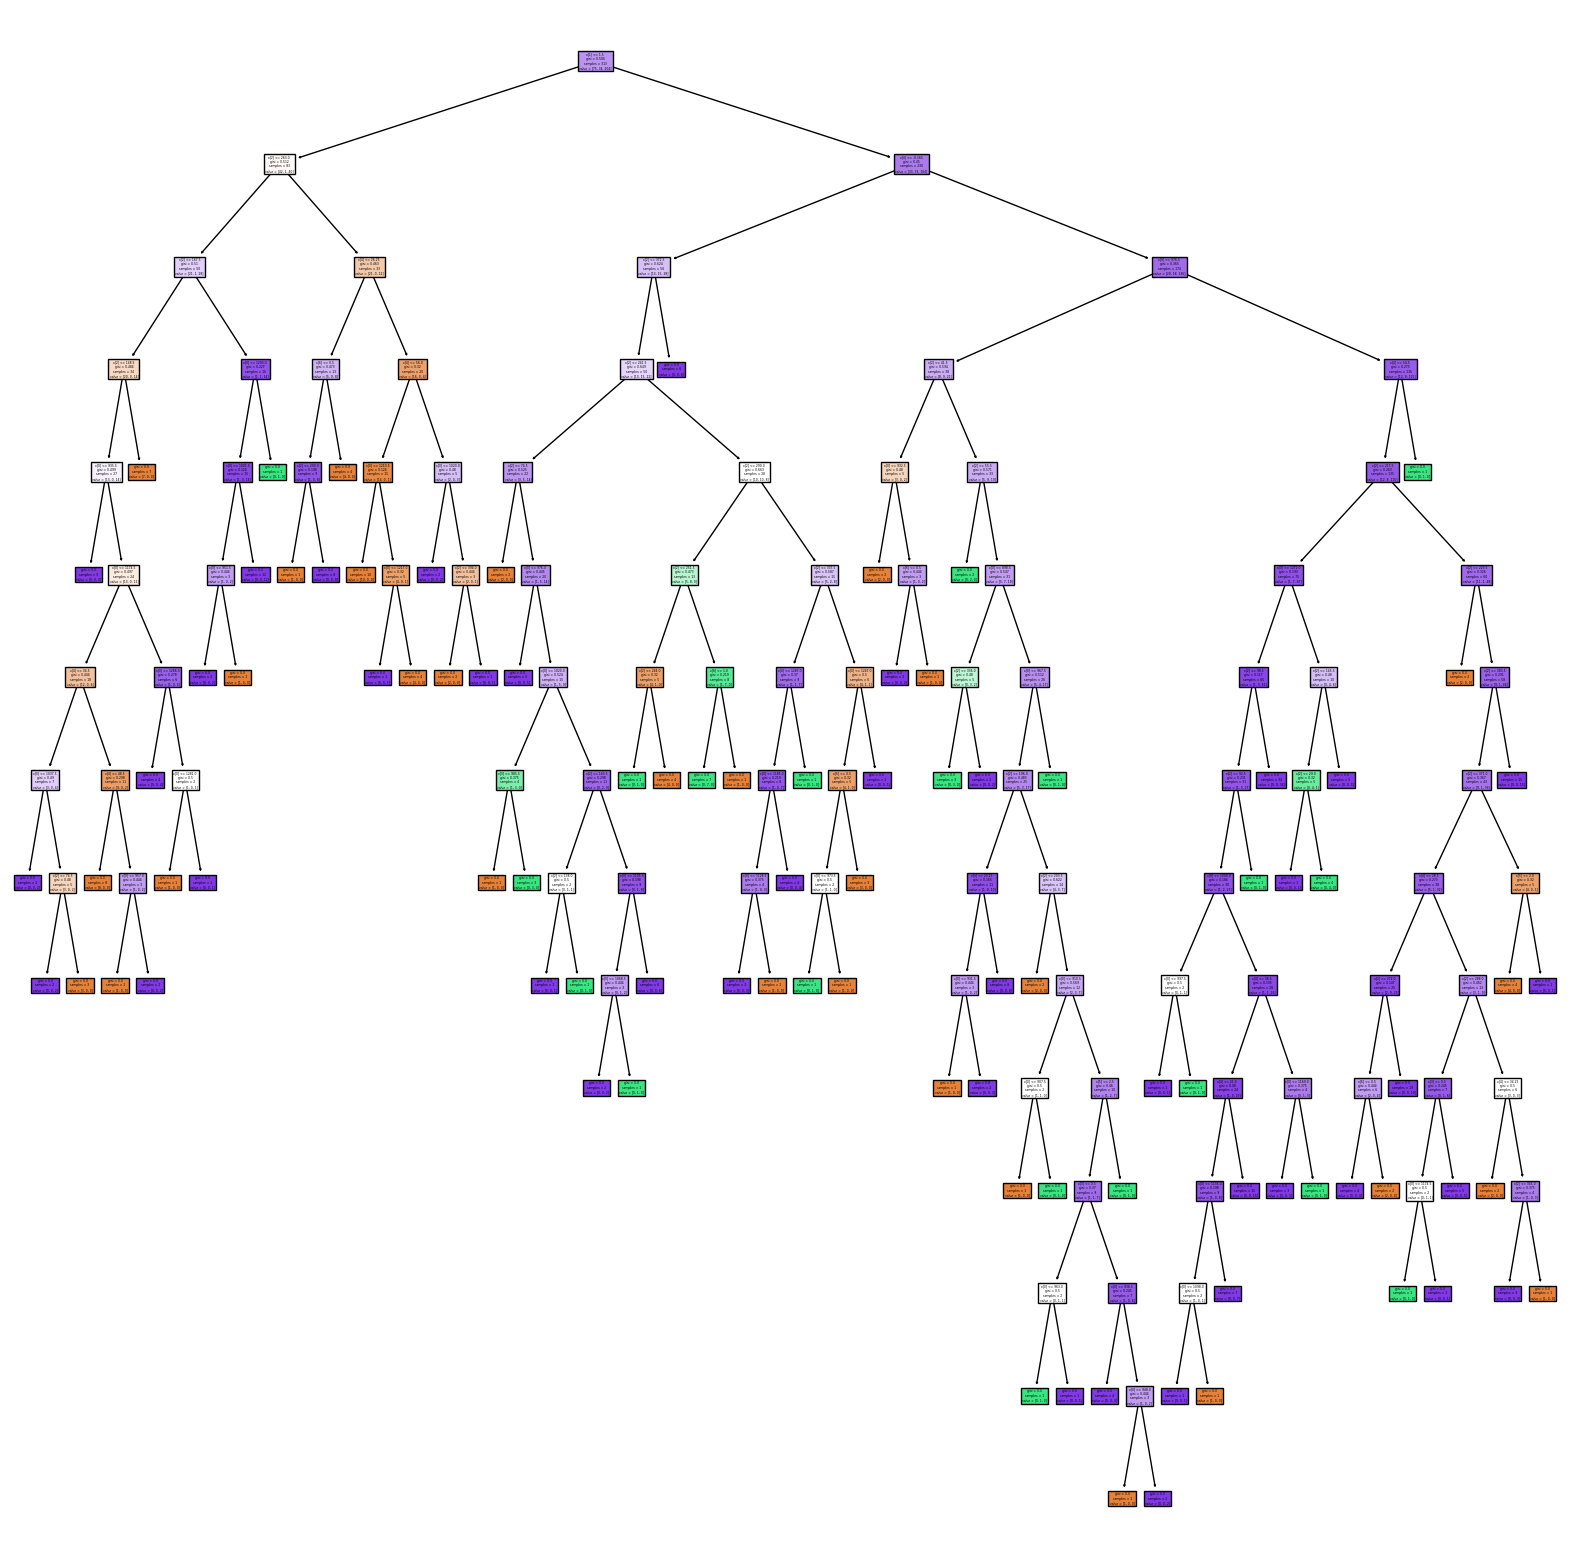

In [57]:
from sklearn import tree
plt.figure(figsize=(20,20))
tree.plot_tree(ds,filled=True)